## Adam

Précision: je n'aime pas les jupyter notebooks pour programmer. L'objectif ici est uniquement de présenter les résultats
obtenus jusqu'ici. Les codes sources sont organisés dans le dossier du projet et sont utilisés pour générer les figures
de ce jupyter.

### Structure

Les différents algorithmes d'optimisation sont dans le dossier `optimizers/`, chaque fichier porte le nom de l'algorithme
qu'il contient et contient une unique fonction correspondant à la fonction "de pas" de la méthode en question. 
Les différentes fonctions sont commentées et programmées de manière aussi intelligible que possible.

### Plan du notebook

Tout d'abord nous rappellerons les grandes lignes de l'algorithme `adam`, dont l'implémentation se trouve dans 
`optimizers/adam.py` puis nous testerons et visualiserons les différents algorithmes d'optimisation sur un problème jouet
consistant à minimiser une fonction de coût de deux paramètres dont on afficherons la surface et les pas effectués par 
les différents algorithmes. Ensuite, nous testerons les différents algorithmes sur la SVM vue en cours.

### Adam

Adam est un algorithme d'optimisation qui mêle adaptation du learning rate en conservant un estimateur de la variance de
chaque coordonnées des gradients appliqués, et inertie (momentum en anglais), c'est à dire qu'il utilise tous les 
gradients précédents, en fait leur moyenne, pour décider de la direction à prendre au temps `t`.

### Expériences

In [1]:
# Some imports

# Usual tools
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import copy

# For video
from IPython.display import Video, HTML

# Losses defined in class
from svm import hingereg as loss_fn, gradreg as grad_fn, predict

# Losses for the toy problem
from toys_function import grad_2d, loss_2d

# The different optimizer I coded

from optimizers.adam import adam_step
from optimizers.sgd import sgd_step
from optimizers.rmsprop import rms_step
from optimizers.momentum import simple_momentum_step
from optimizers.adagrad import adagrad_step

# Tools for training

# For Mnist
from mnist import training_loop, plots

# for the toy example
from toy_loop import training_loop as toy_trainin_loop, plot_heatmap, animate

In [2]:
# Parameters for the toy example

epochs = 300
init = np.array([15.,15.])


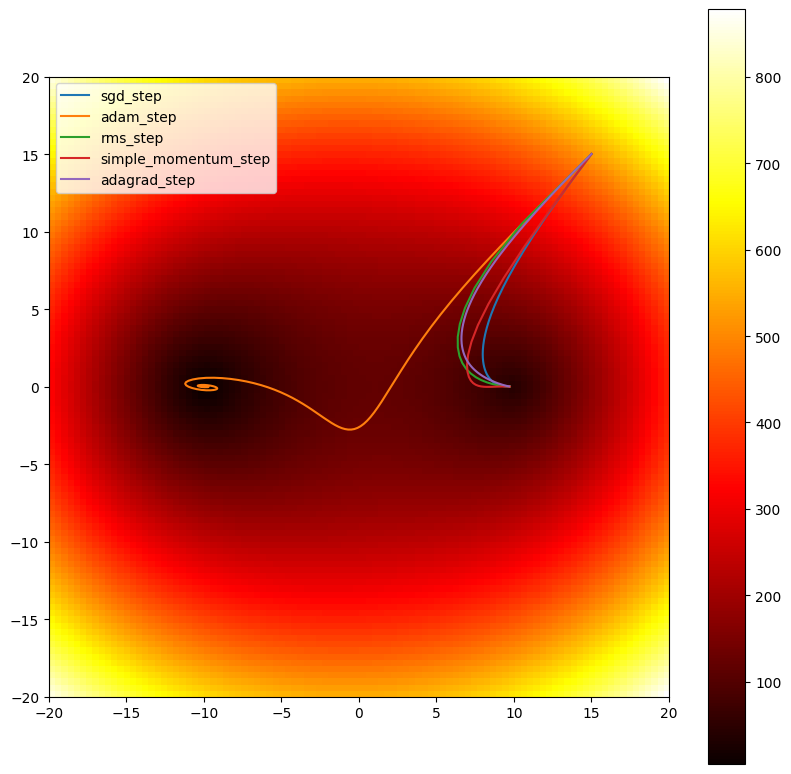

<Figure size 432x288 with 0 Axes>

In [3]:
# We display the background
plot_heatmap(loss_2d, -20, 20, -20, 20)

all_path = []

# We optimize the function using our algorithms and we keep the taken path for making a really cool video
all_path.append(toy_trainin_loop(epochs, copy(init), step_function=sgd_step, loss_fn=loss_2d, grad_fn=grad_2d))
all_path.append(toy_trainin_loop(epochs, copy(init), step_function=adam_step, loss_fn=loss_2d, grad_fn=grad_2d))
all_path.append(toy_trainin_loop(epochs, copy(init), step_function=rms_step, loss_fn=loss_2d, grad_fn=grad_2d))
all_path.append(toy_trainin_loop(epochs, copy(init), step_function=simple_momentum_step, loss_fn=loss_2d, grad_fn=grad_2d))
all_path.append(toy_trainin_loop(epochs, copy(init), step_function=adagrad_step, loss_fn=loss_2d, grad_fn=grad_2d))

# Display the figure generated by the training loop
plt.show()
plt.clf()

<Figure size 720x720 with 0 Axes>

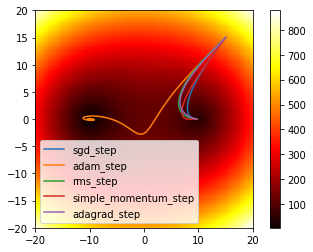

In [4]:
# This is in a separate cell since it can take a while
# We build the video
animate("exports/animation-notebook.mp4", all_path, loss_2d)

In [5]:
Video("exports/animation-notebook.mp4")

In [6]:
# Open and format data

data_train = pd.read_csv("data/mnist_train.csv").values
data_test = pd.read_csv("data/mnist_test.csv").values

y_train = data_train[:, 0]
x_train = (data_train[:20000, 1:] / 255)

y_test = data_test[:5000, 0]
x_test = data_test[:5000, 1:] / 255

y_train = 2 * np.array(y_train == 0) - 1  # classification 0/autres
y_test = 2 * np.array(y_test == 0) - 1  # classification 0/autres

In [7]:
# Parameters for mnist

epochs = 3
batch_size = 512

#### Graphes pour Adam

In [8]:
# First we test adam
step_function = adam_step

loss_records, valloss_records, accuracy_records, valaccuracy_records = \
    training_loop(epochs, simple_momentum_step, np.random.randn(784), x_train, y_train, batch_size, x_test=x_test,
                  y_test=y_test, lamb=0)

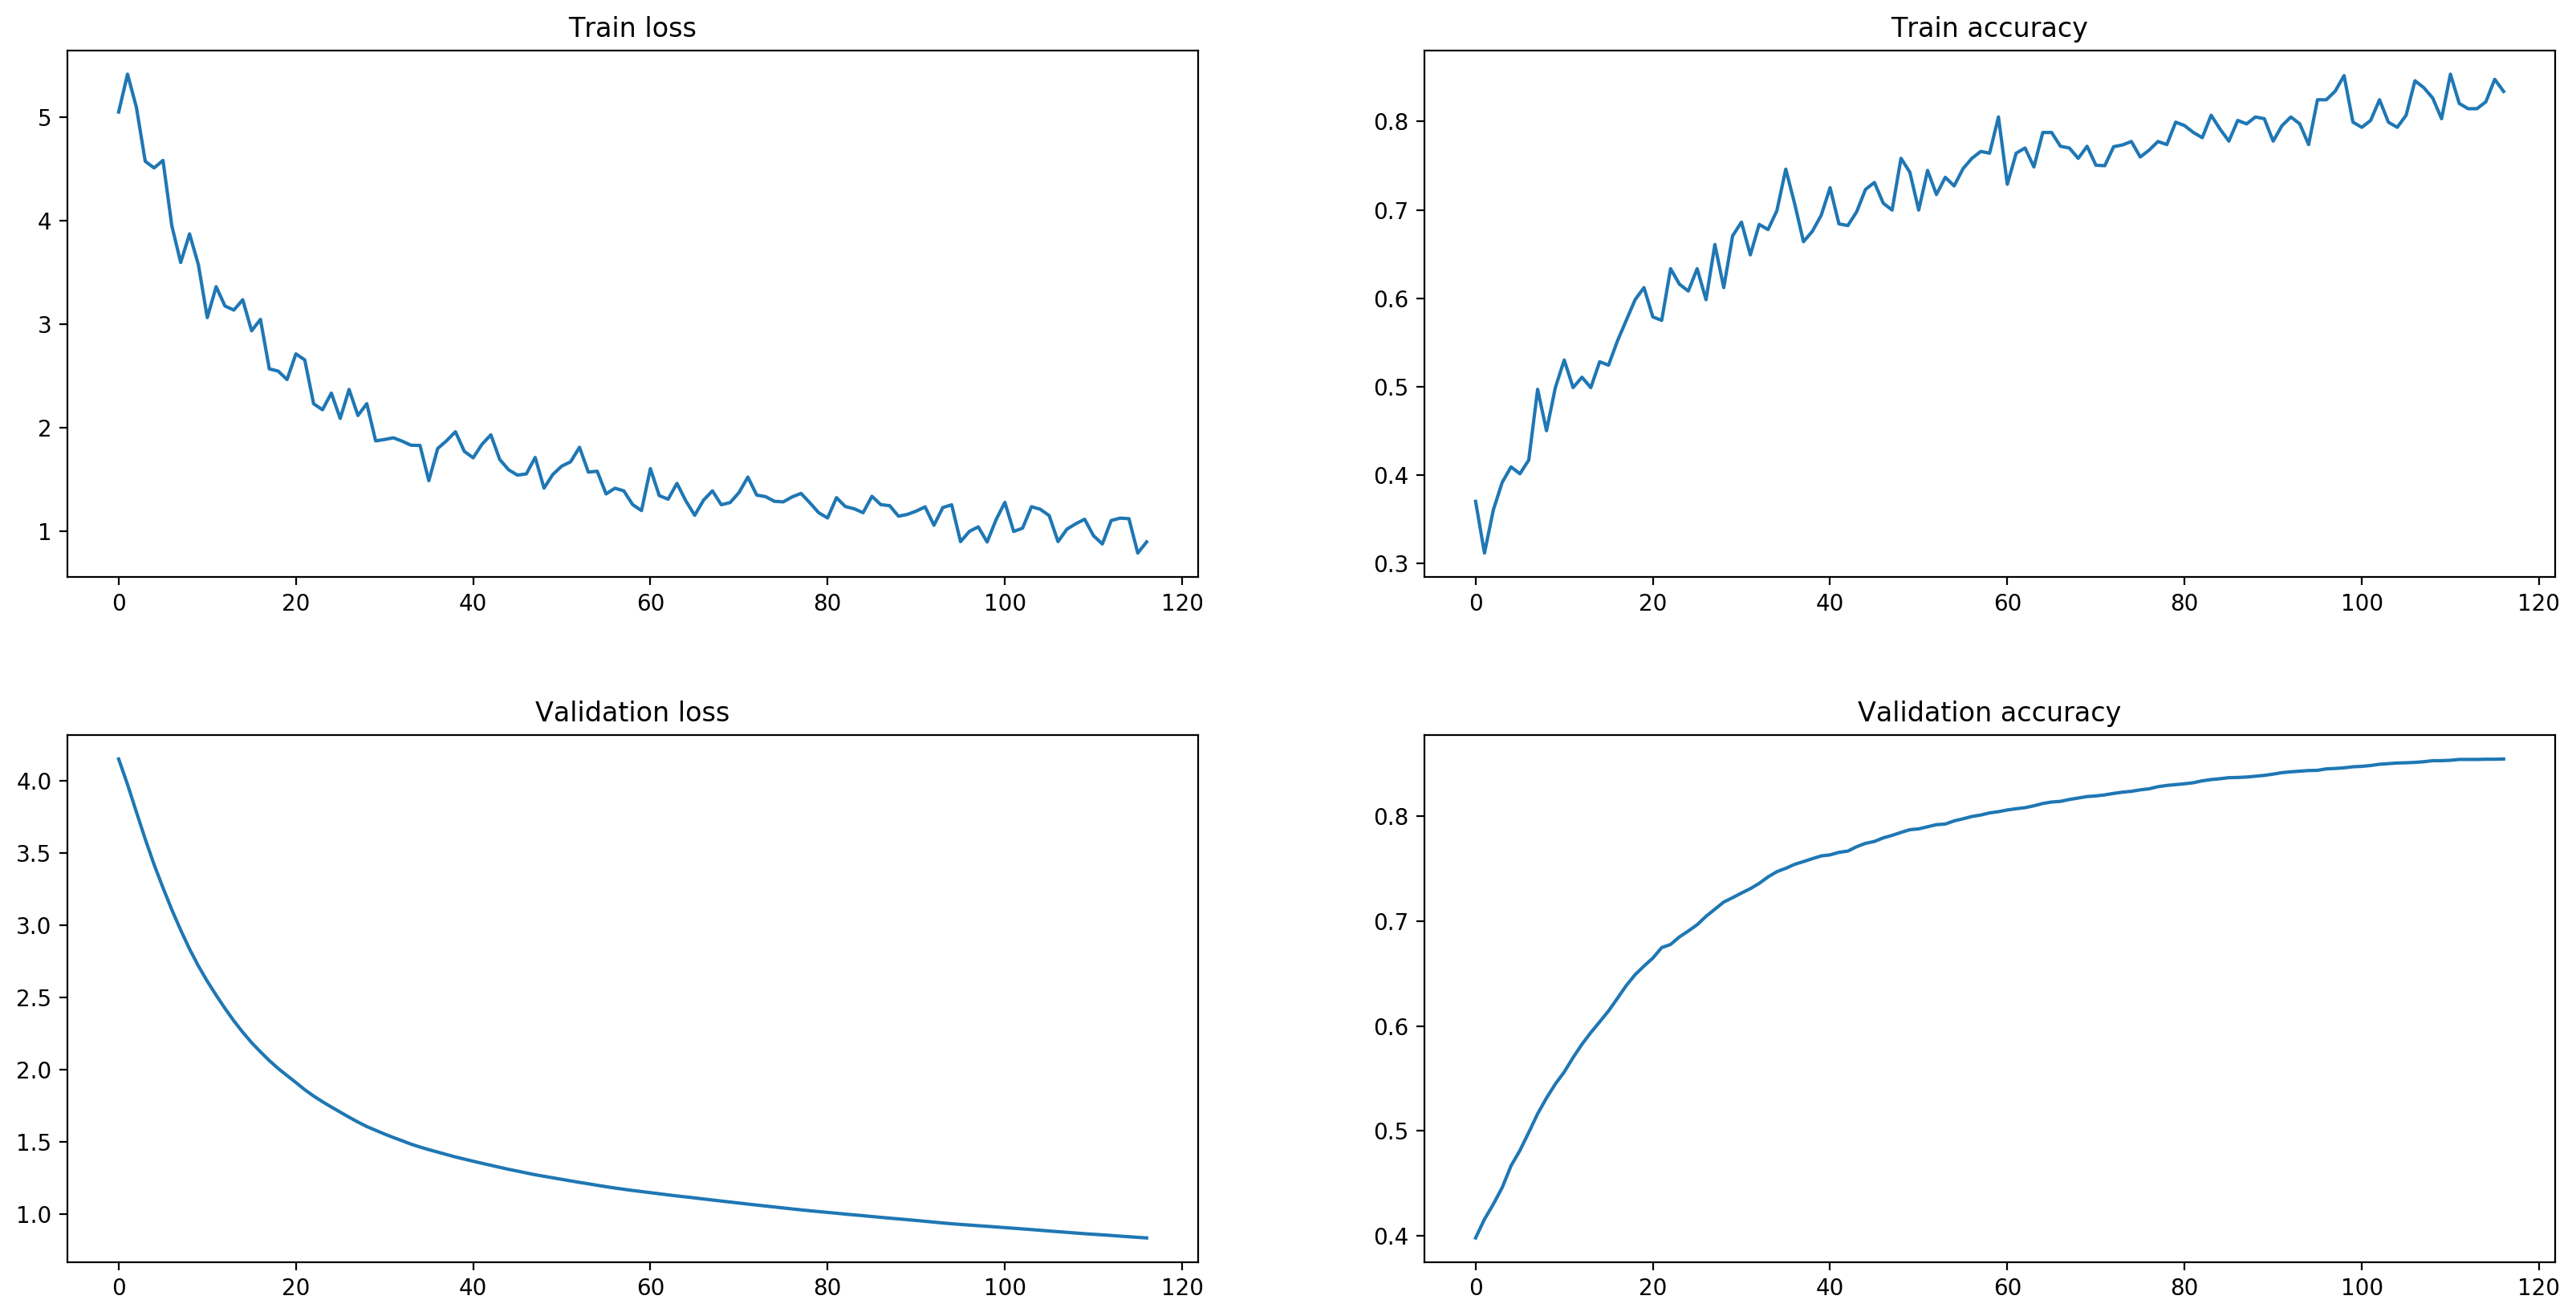

In [9]:
plots(loss_records, valloss_records, accuracy_records, valaccuracy_records)

#### Graphes pour Adagrad

In [10]:
# Adagrad
step_function = adagrad_step

loss_records, valloss_records, accuracy_records, valaccuracy_records = \
    training_loop(epochs, simple_momentum_step, np.random.randn(784), x_train, y_train, batch_size, x_test=x_test,
                  y_test=y_test, lamb=0)

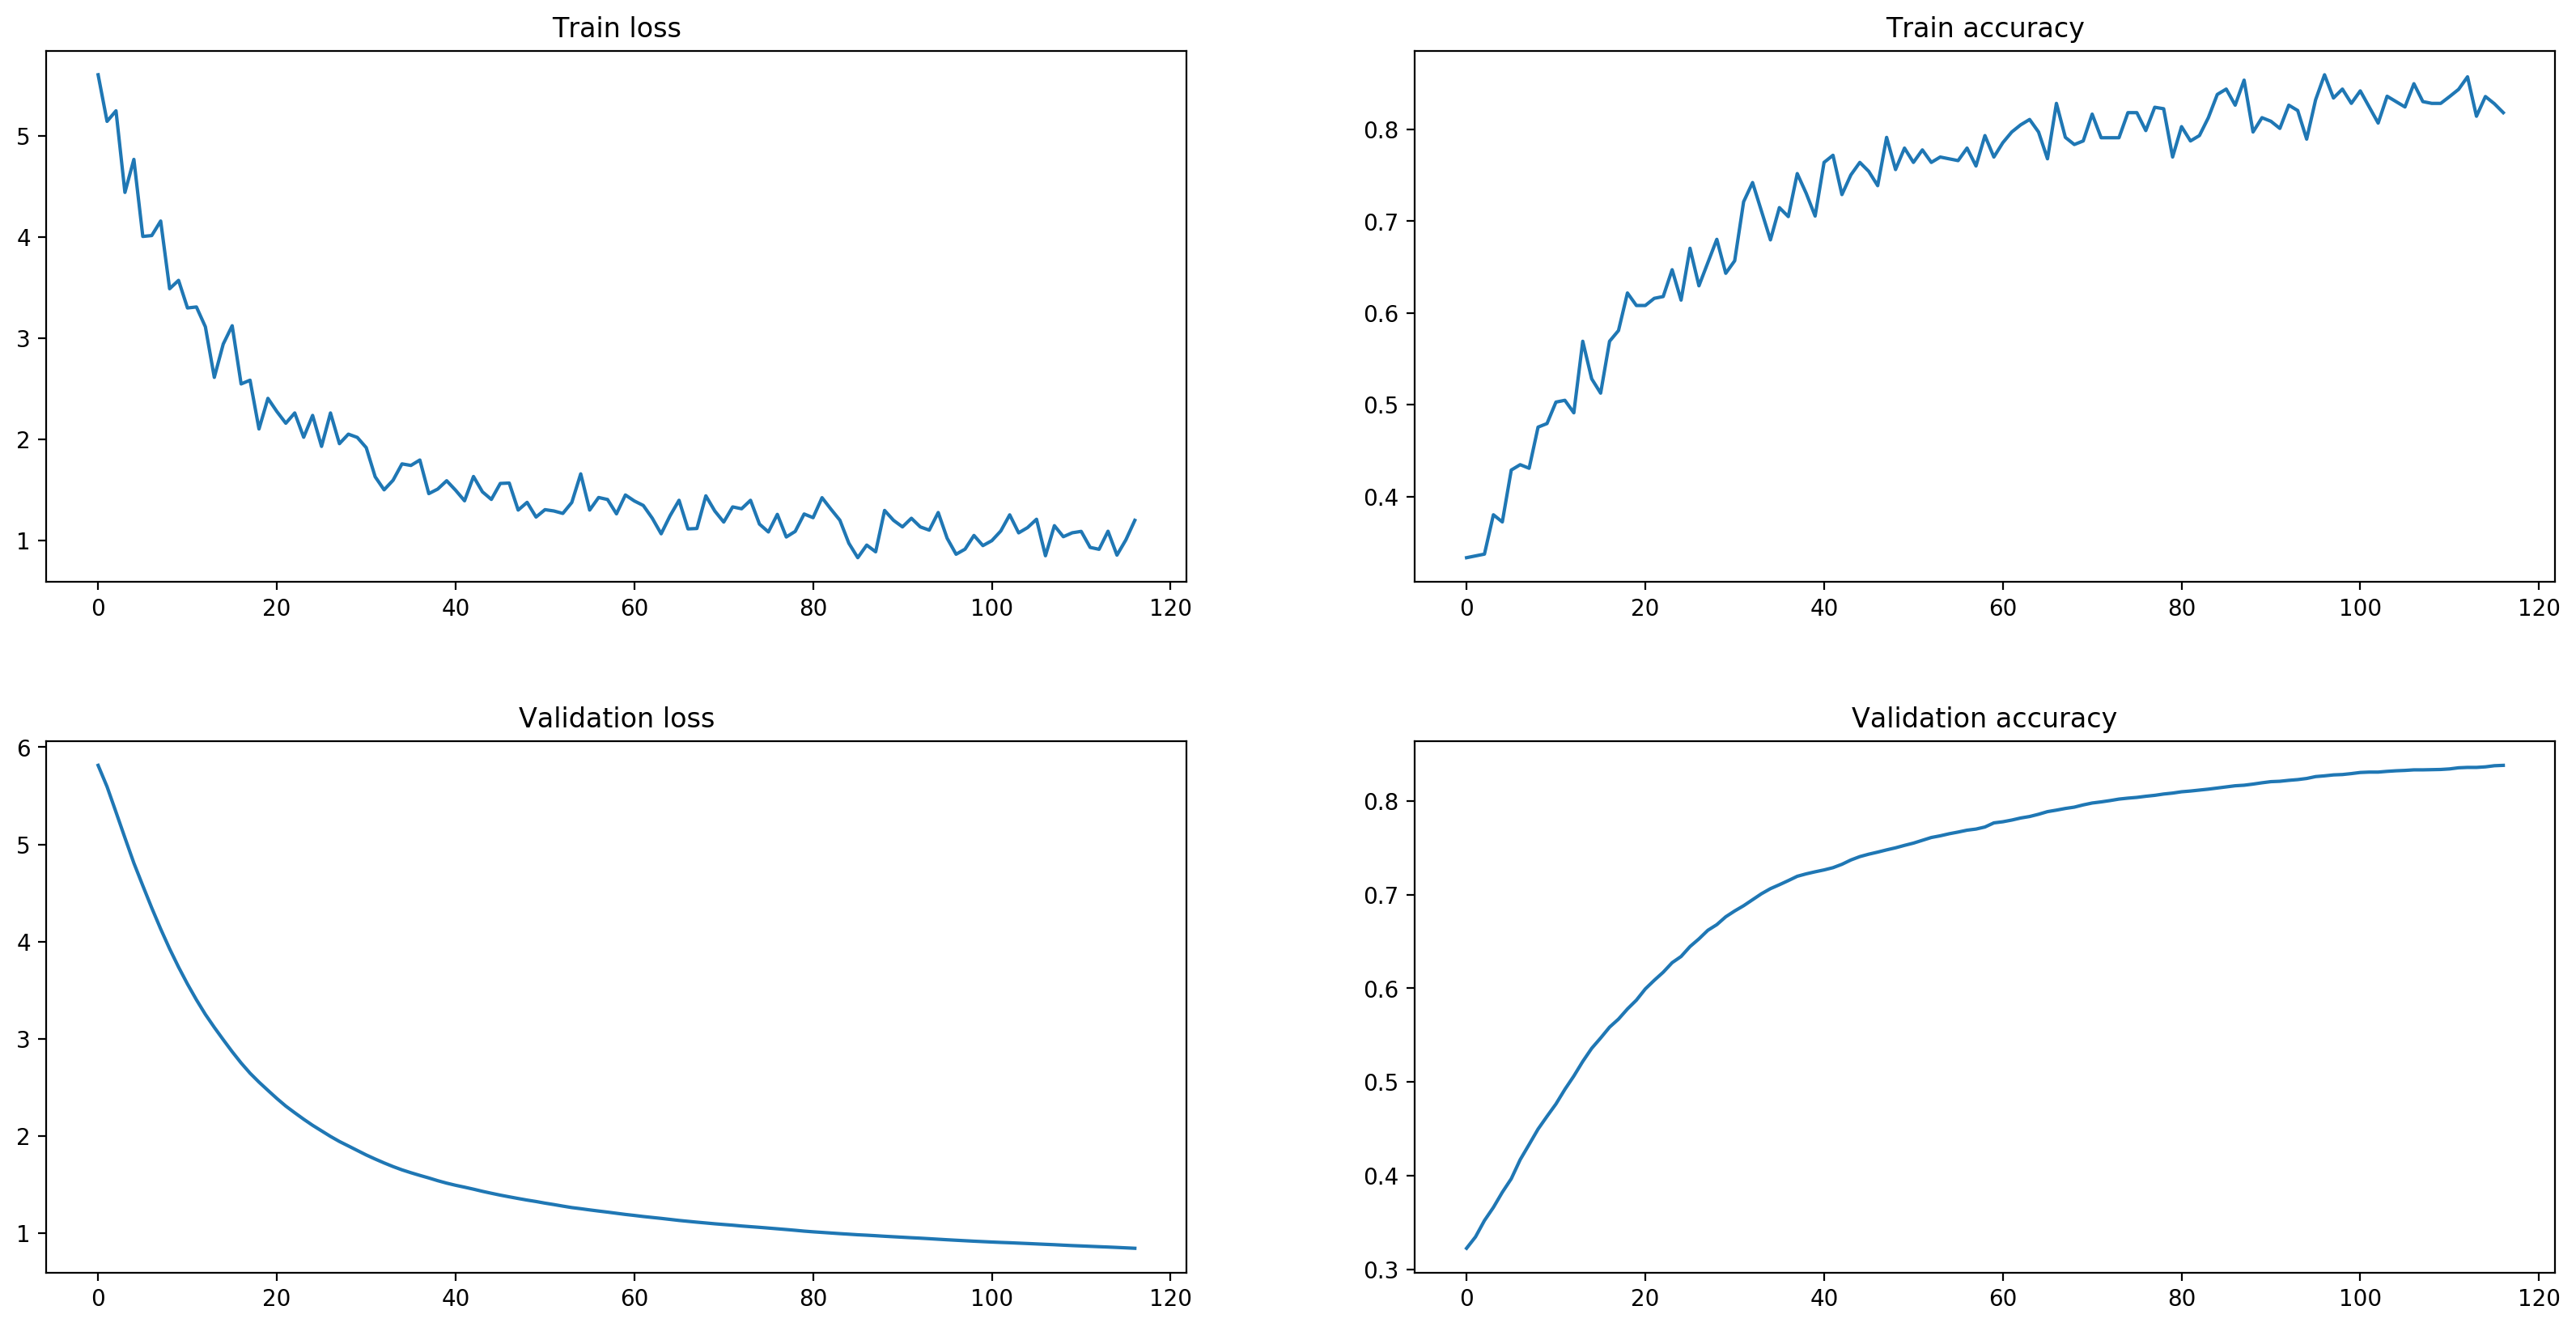

In [11]:
plots(loss_records, valloss_records, accuracy_records, valaccuracy_records)

#### Graphes pour RMSProp

In [12]:
step_function = rms_step

loss_records, valloss_records, accuracy_records, valaccuracy_records = \
    training_loop(epochs, simple_momentum_step, np.random.randn(784), x_train, y_train, batch_size, x_test=x_test,
                  y_test=y_test, lamb=0)

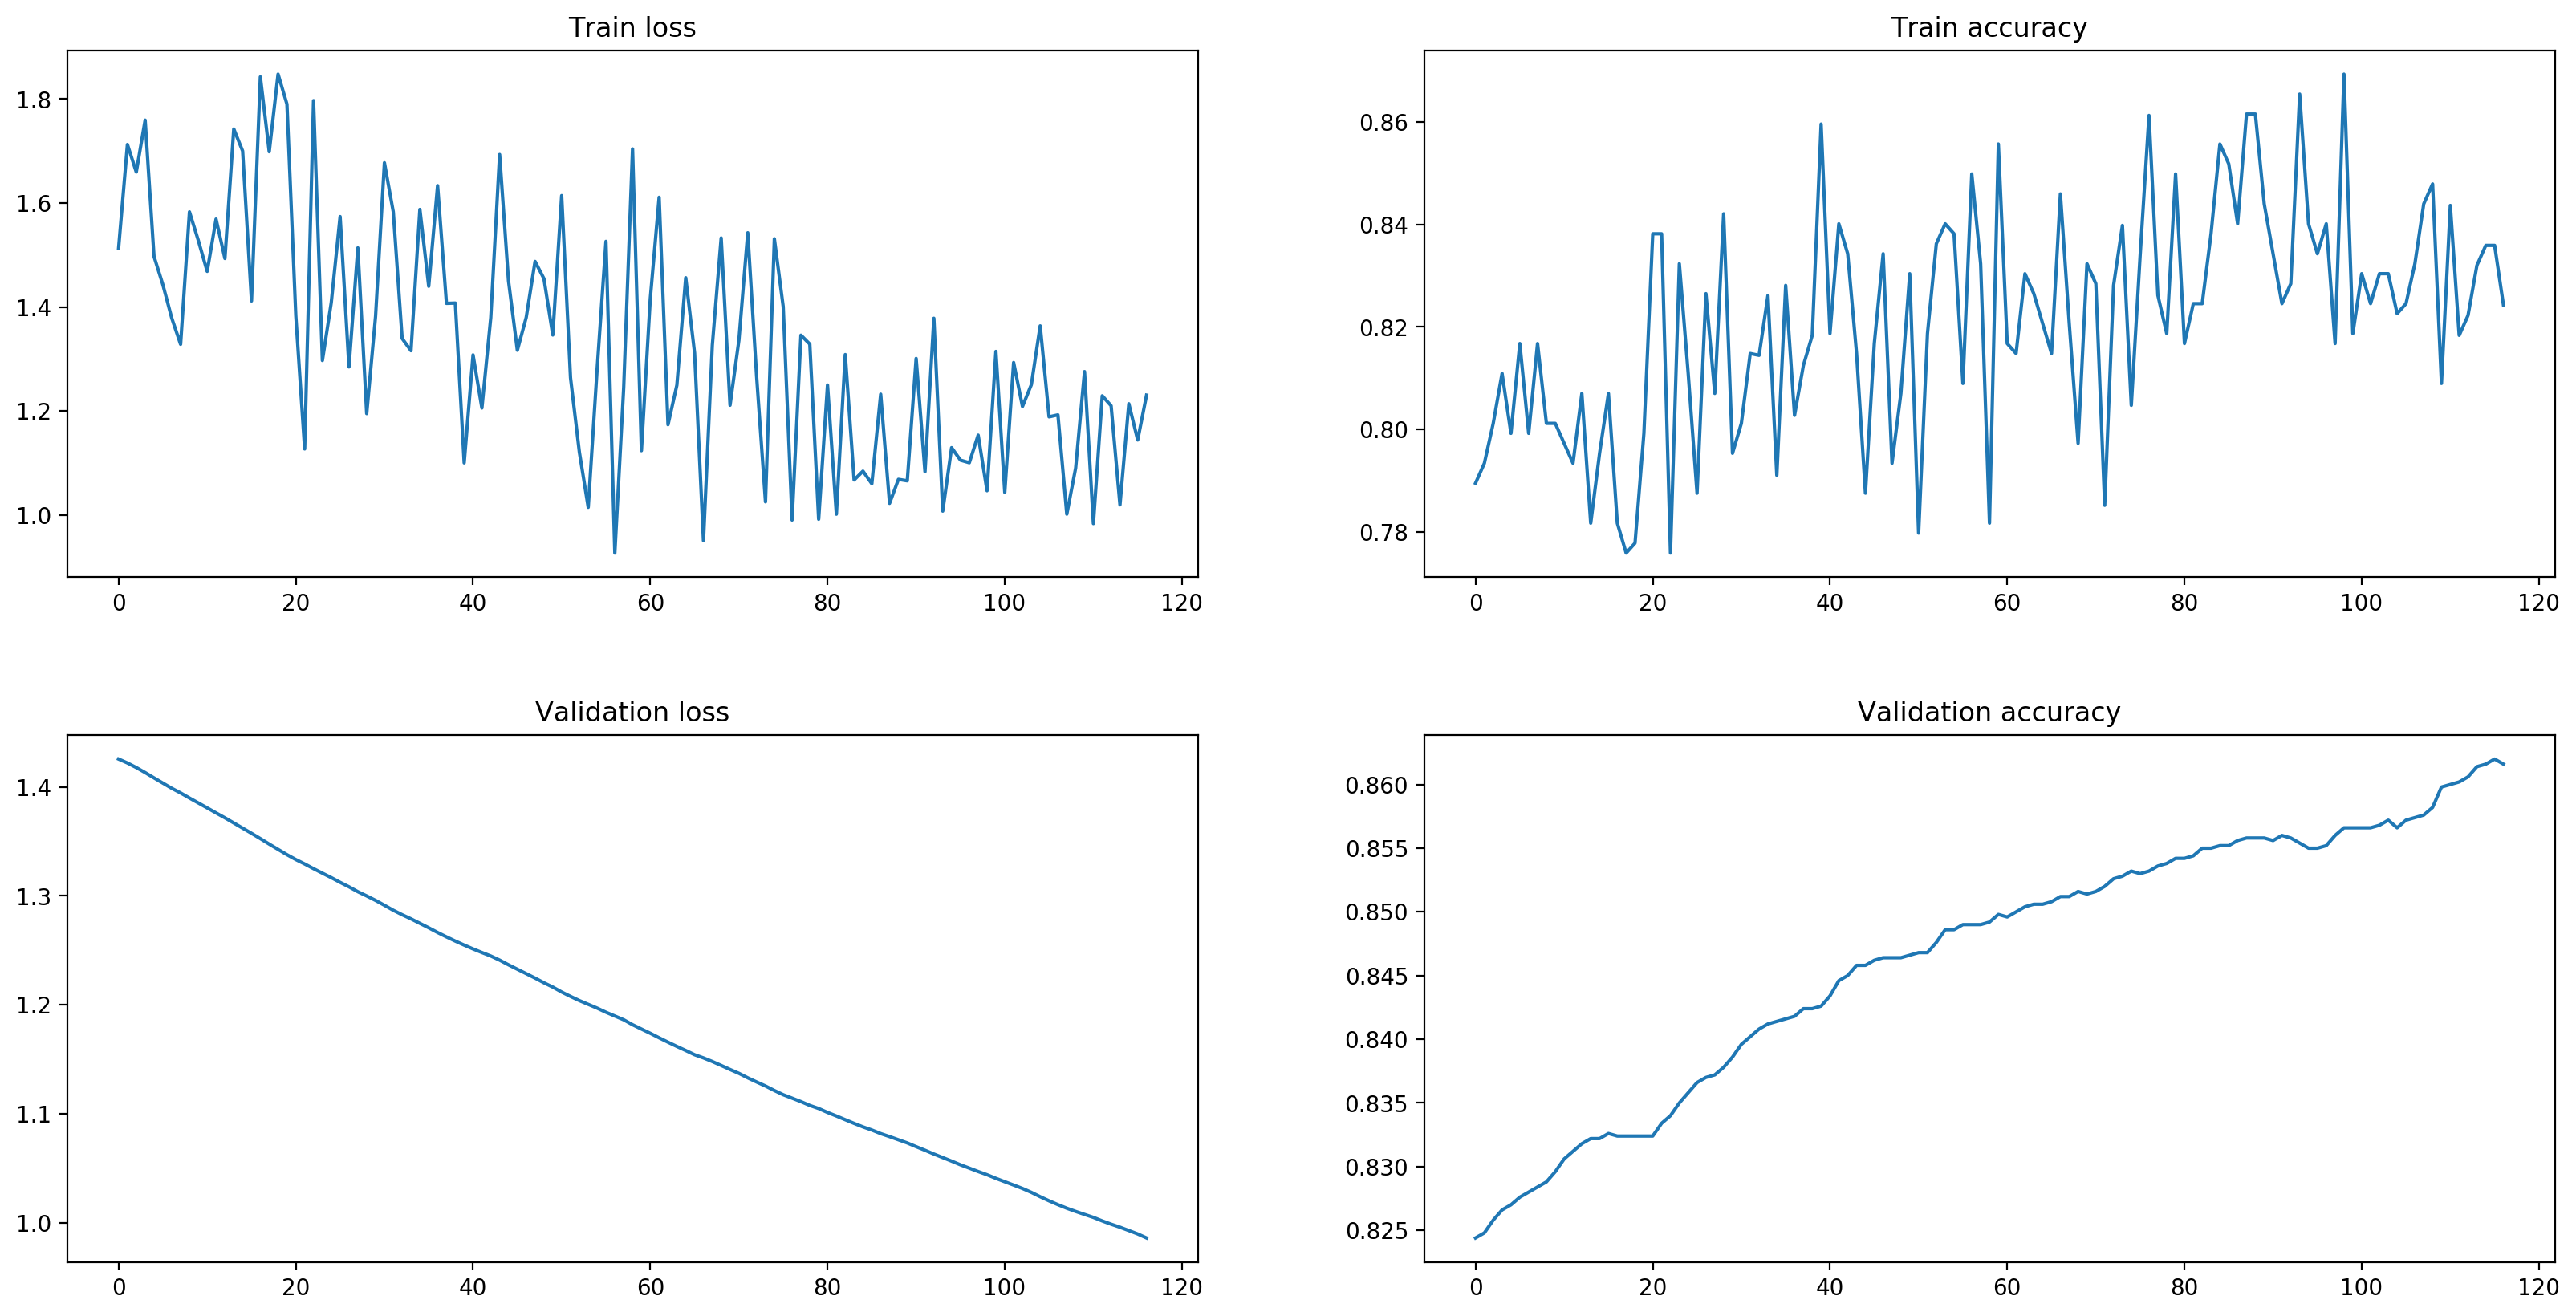

In [13]:
plots(loss_records, valloss_records, accuracy_records, valaccuracy_records)

#### Graphes pour SGD

In [14]:
step_function = sgd_step

loss_records, valloss_records, accuracy_records, valaccuracy_records = \
    training_loop(epochs, simple_momentum_step, np.random.randn(784), x_train, y_train, batch_size, x_test=x_test,
                  y_test=y_test, lamb=0)

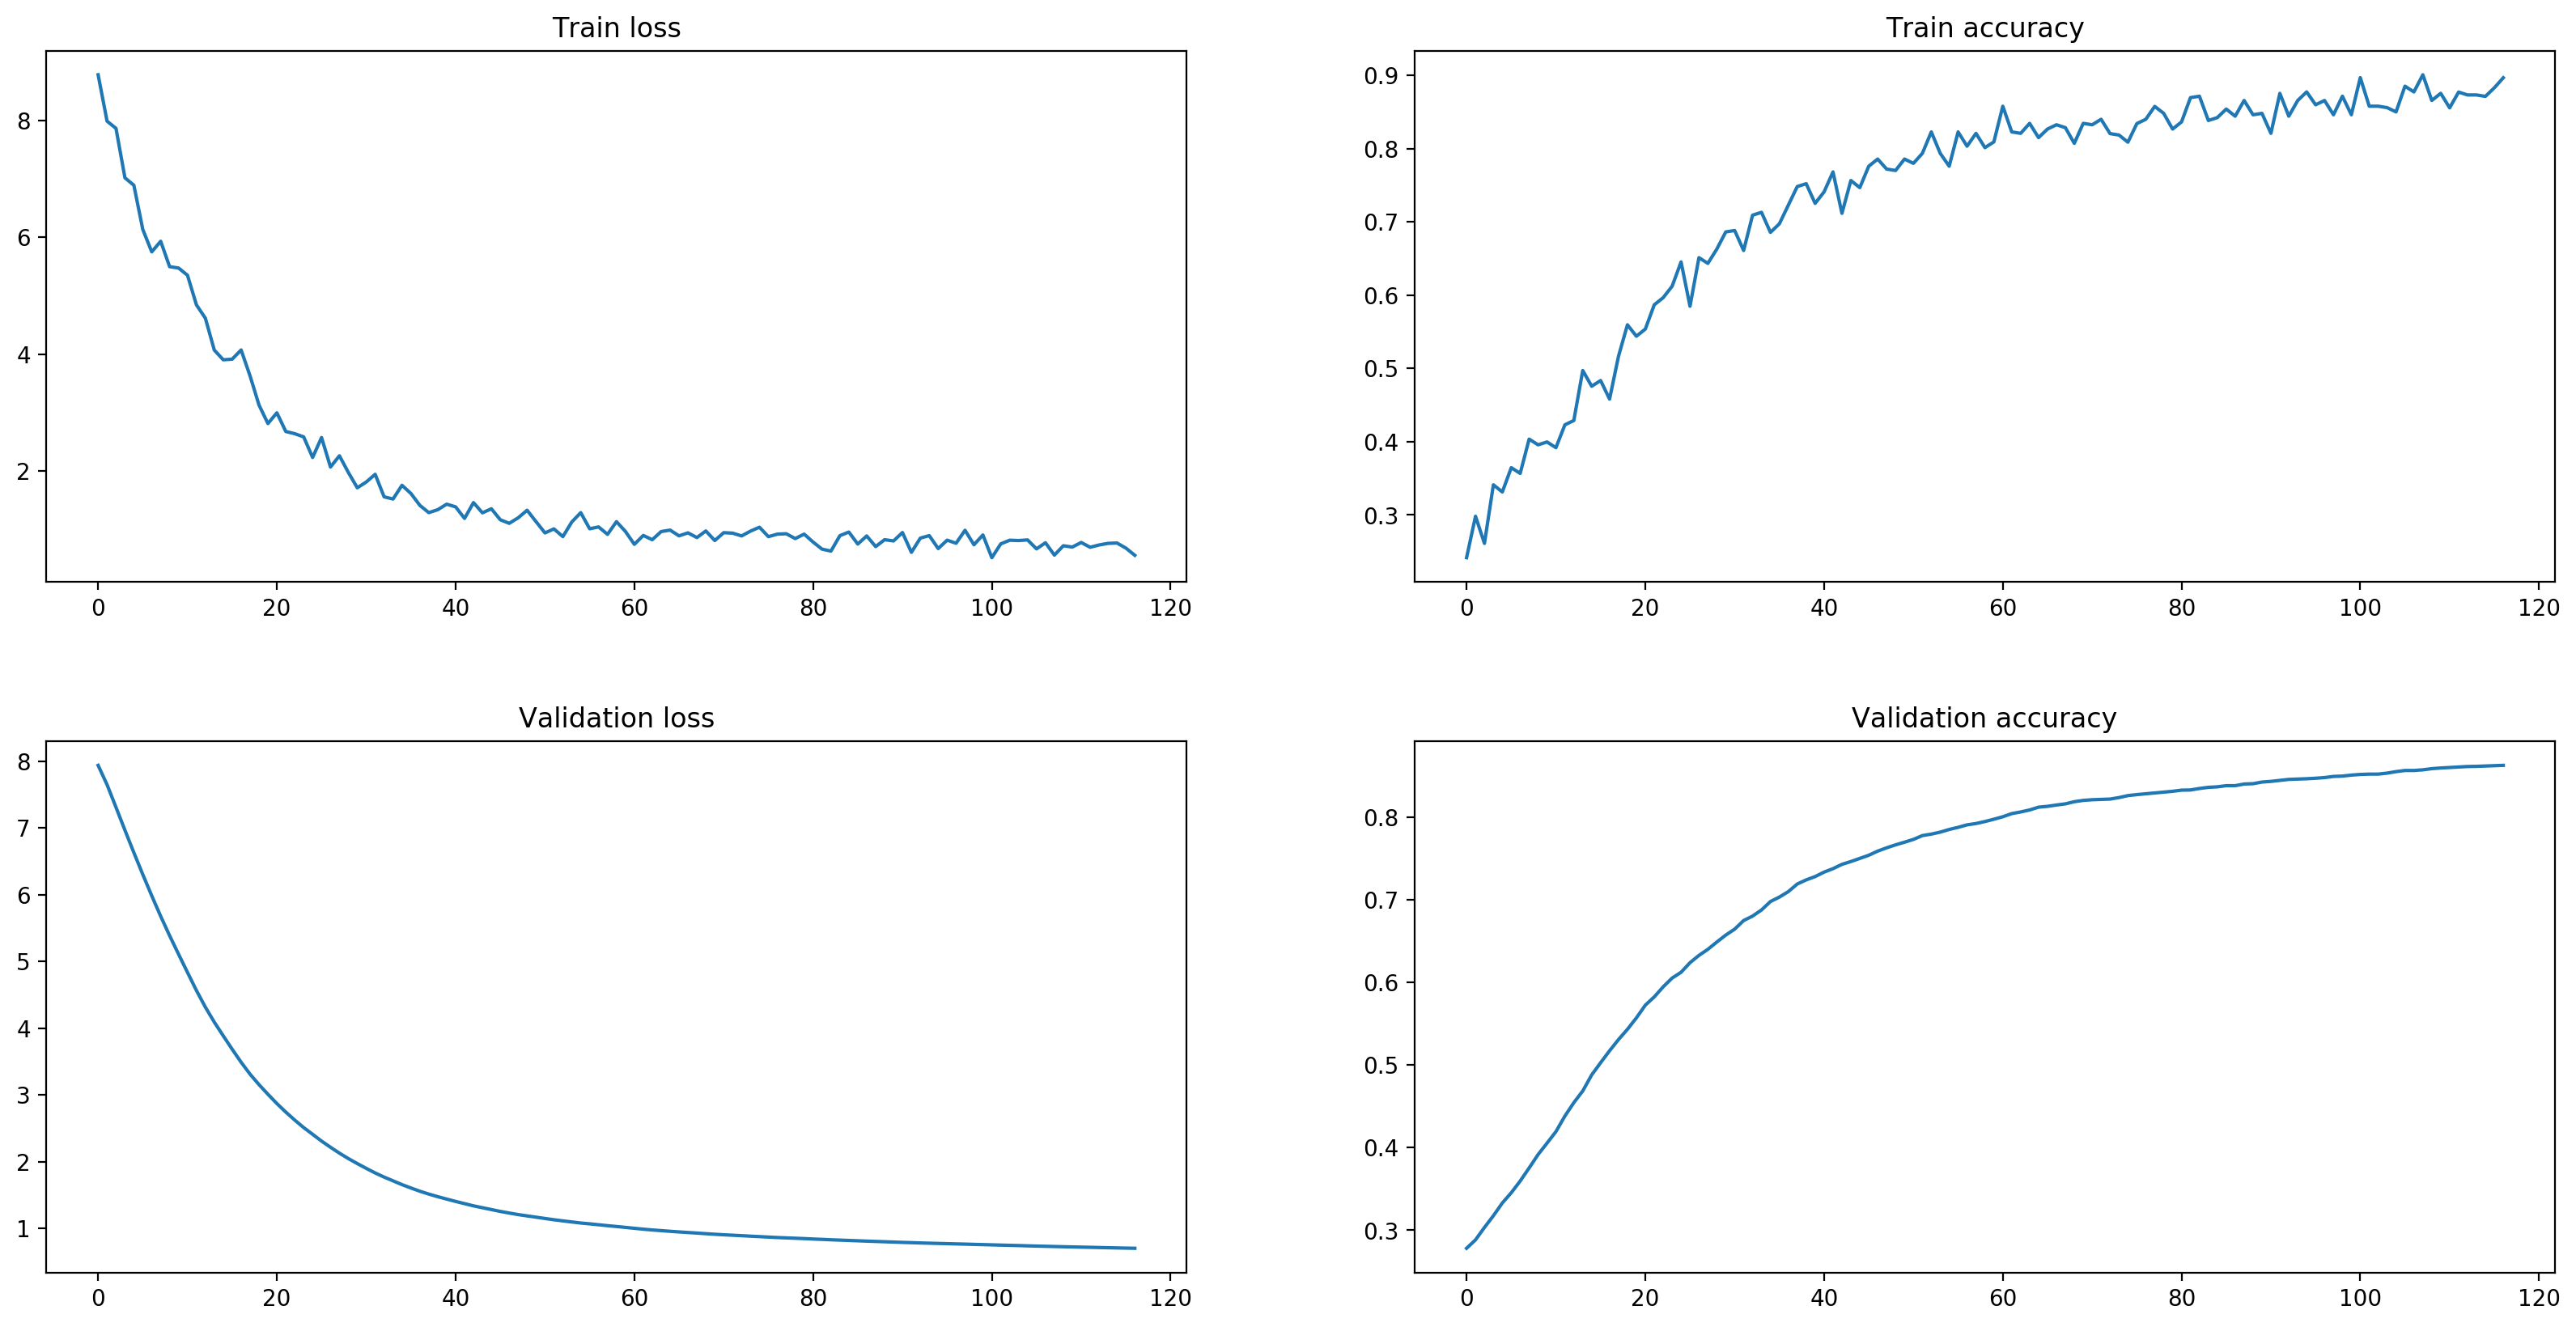

In [15]:
plots(loss_records, valloss_records, accuracy_records, valaccuracy_records)

#### Graphes pour Momentum

In [16]:
step_function = simple_momentum_step

loss_records, valloss_records, accuracy_records, valaccuracy_records = \
    training_loop(epochs, simple_momentum_step, np.random.randn(784), x_train, y_train, batch_size, x_test=x_test,
                  y_test=y_test, lamb=0)

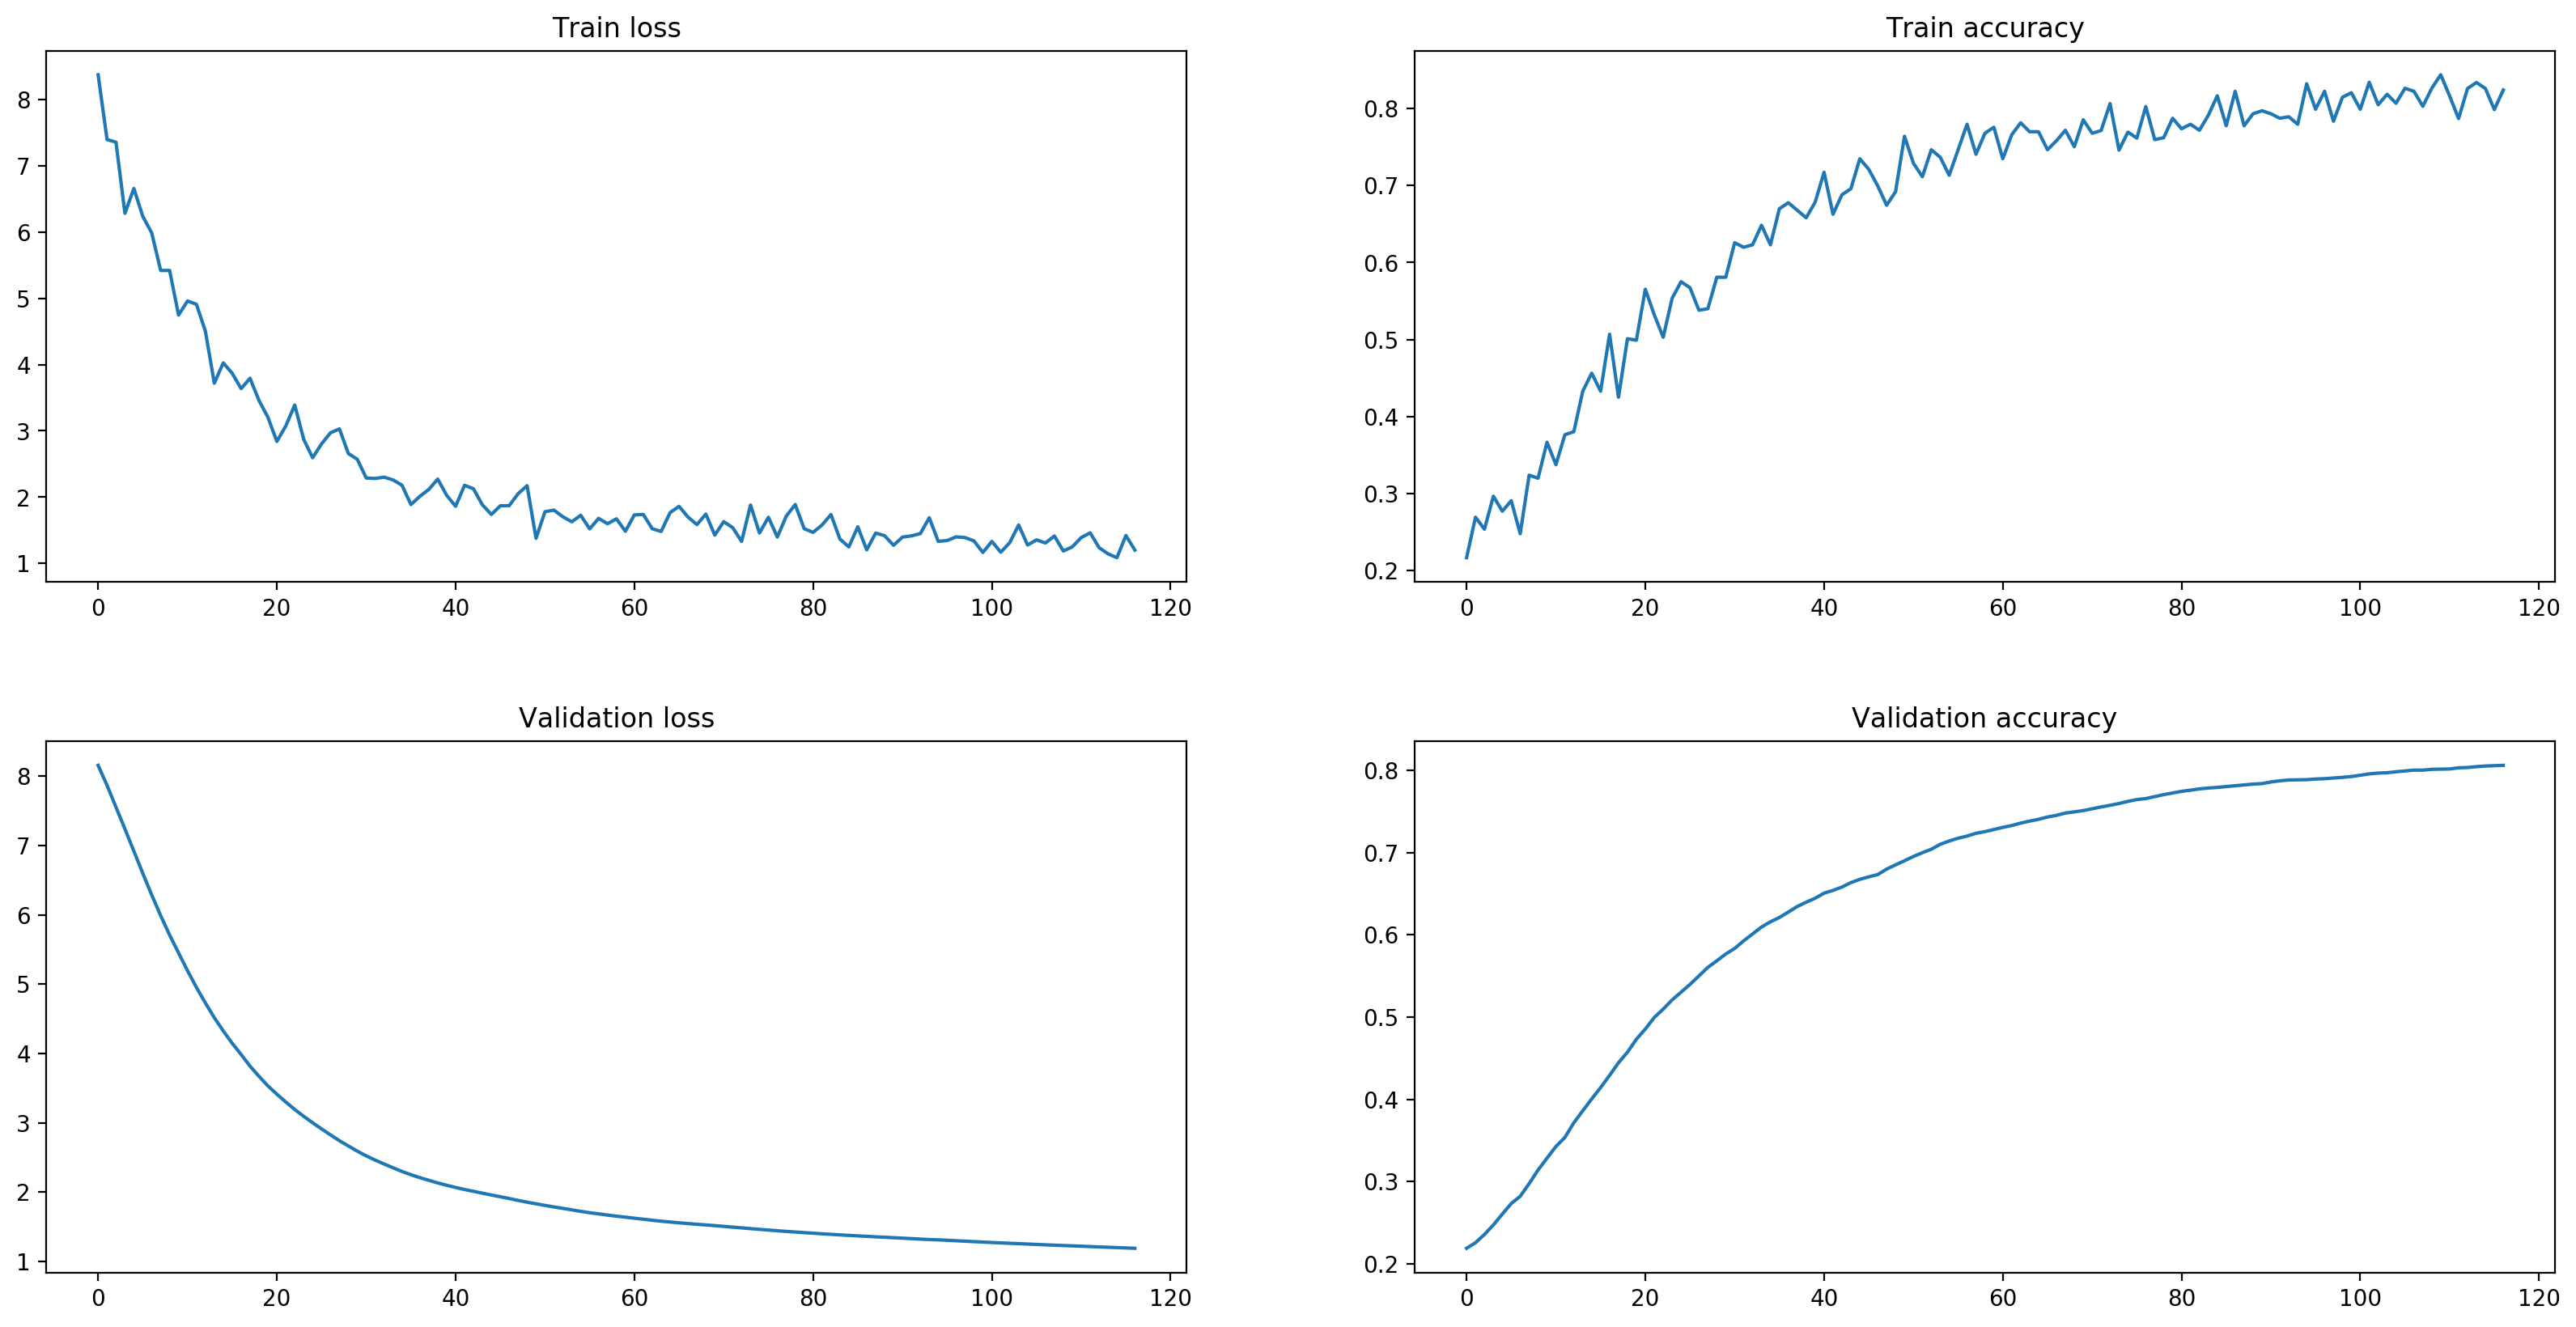

In [17]:
plots(loss_records, valloss_records, accuracy_records, valaccuracy_records)
